In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import functools

%matplotlib inline

In [25]:
#case_dir = '../rhoReactingFoam_convection'

case_dir = '../reactingFoam_mixing'

In [50]:
dfs = []
for d in ['energyInletFuel', 'energyInletAir', 'energyOutlet']:
    df = pd.read_csv(os.path.join(case_dir, 'postProcessing', d, '0', 'surfaceFieldValue.dat'),
                     comment='#', sep='\s+', header=None)
    df.columns = ['Time', d]
    dfs.append(df)

energy = functools.reduce(lambda left,right: pd.merge(left,right,on='Time'), dfs)
    
dfs = []
for d in ['massInletFuel', 'massInletAir', 'massOutlet']:
    df = pd.read_csv(os.path.join(case_dir, 'postProcessing', d, '0', 'surfaceFieldValue.dat'),
                     comment='#', sep='\s+', header=None)
    df.columns = ['Time', d]
    dfs.append(df)
mass = functools.reduce(lambda left,right: pd.merge(left,right,on='Time'), dfs)



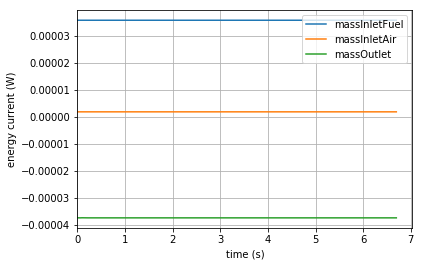

(0, 7.0295000000000005)

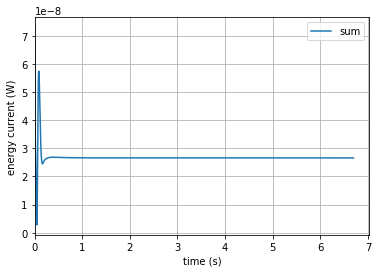

In [51]:
# plt.plot(energy['Time'], energy['energyInlet'], label='inlet')
# plt.plot(energy['Time'], energy['energyOutlet'], label='outlet')
plt.plot(energy['Time'], energy.iloc[:, 1:])
plt.grid()
plt.legend(mass.columns[1:])
plt.xlabel('time (s)')
plt.ylabel('energy current (W)')
plt.xlim(0)
plt.show()
plt.plot(energy['Time'], energy['energyInletFuel'] + energy['energyInletAir'] + energy['energyOutlet'], label='sum')
plt.grid()
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('energy current (W)')
plt.xlim(0)

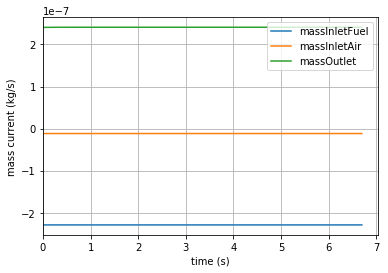

(0, 7.0295000000000005)

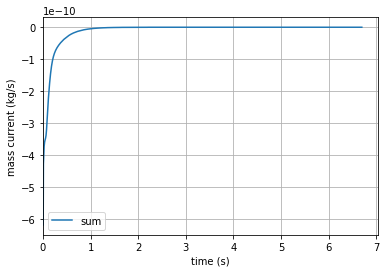

In [52]:
# plt.plot(energy['Time'], energy['energyInlet'], label='inlet')
# plt.plot(energy['Time'], energy['energyOutlet'], label='outlet')
plt.plot(mass['Time'], mass.iloc[:, 1:])
plt.legend(mass.columns[1:])
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('mass current (kg/s)')
plt.xlim(0)
plt.show()
plt.plot(mass['Time'], mass['massInletFuel'] + mass['massInletAir'] + mass['massOutlet'], label='sum')
plt.grid()
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('mass current (kg/s)')
plt.xlim(0)